In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact
from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib widget

# Waves Fundamental

This is an interactive notebook to visualize waves and interference properties. I have collapsed the codes that generate the figures, as that is not the focus here. Make sure you restart the kernel and run all cells to draw everything properly (the little double-arrow).

![](documentation/screenshot.png)

## Single propagating wave

Below is the graph of a single EM-wave $|{\vec{E}(r, t)}| = E(r, t)$ defined as

$$
|\vec{E}(r, t)| = Re\{\exp{i(\vec{k}\cdot\vec{r}-\omega t)}\}
$$

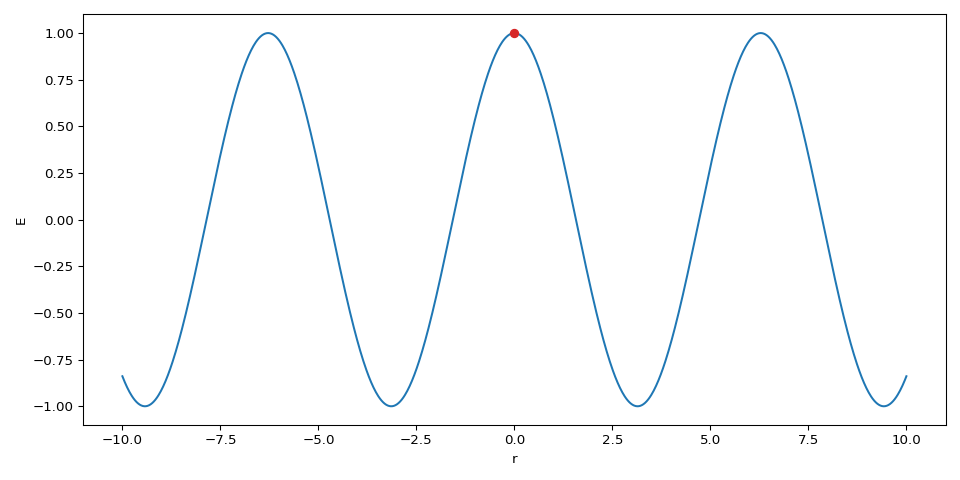

interactive(children=(FloatSlider(value=1.0, description='k', max=2.0, min=0.1), FloatSlider(value=1.0, descri…

In [2]:
# frequency and wavevector
k = 1
w = 1

# Single wave
E = lambda r, t: np.exp(1j * (k * r - w * t))

# Create initial graph
t = 0
fig1 = plt.figure(figsize=[10, 5], dpi=96)
r = np.linspace(-10, 10, 1000)
line_wave = plt.plot(r, E(r, t).real)
arrow = plt.plot([0, (w * (t)) / k], [1, 1], color="tab:red", marker="|")
point = plt.plot(0, 1, "o", color="tab:red")
plt.xlabel("r")
plt.ylabel("E")
plt.tight_layout()
plt.show()


# update graph
@interact(k=(0.1, 2, 0.1), w=(0.1, 2, 0.1), t=(-10, 10, 0.1))
def update_graph(k, w, t):
    t = np.round(t, 2)
    k = np.round(k, 2)
    w = np.round(w, 2)
    E = lambda r, t: np.exp(1j * (k * r - w * t))
    point[0].set_xdata((w * (t)) / k)
    line_wave[0].set_ydata(E(r, t))
    arrow[0].set_xdata([0, (w * (t)) / k])
    fig1.suptitle(
        "$r = {:.2f}$\t$t = {:.2f}$\t$u_p = {:.2f}$".format((w * (t)) / k, t, w / k)
    )
    plt.tight_layout()

## Two propagating waves

Below is a graph showing the resulting superposition of two EM-waves of slightly different frequency (and wavelengths),

$$
E_1(r, t) = Re\{\exp i((k+\Delta k)r-(\omega+\Delta \omega)t)\}
$$

$$
E_2(r, t) = Re\{\exp i((k-\Delta k)r-(\omega-\Delta \omega)t)\}
$$

The resulting wave is

$$
E(r, t) = E_1+E_2 = Re\{\exp i((kr-\omega t)\}\cos(\Delta kr - \Delta\omega t)
$$

In other words, the resulting wave is a single frequency **carrier wave** of frequency  travelling at the **phase velocity** $u_p$ multiplied by the **envelope**  (here $\cos(\Delta kr - \Delta\omega t)$) travelling at the **group velocity** $u_g$.

$$
u_p = \frac{\omega}{k} = \frac{2\pi\nu}{2\pi/\lambda} = \lambda \nu = c
$$

$$
u_g = \frac{\Delta \omega}{\Delta k} \rightarrow u_g = \frac{d\omega}{dk}
$$

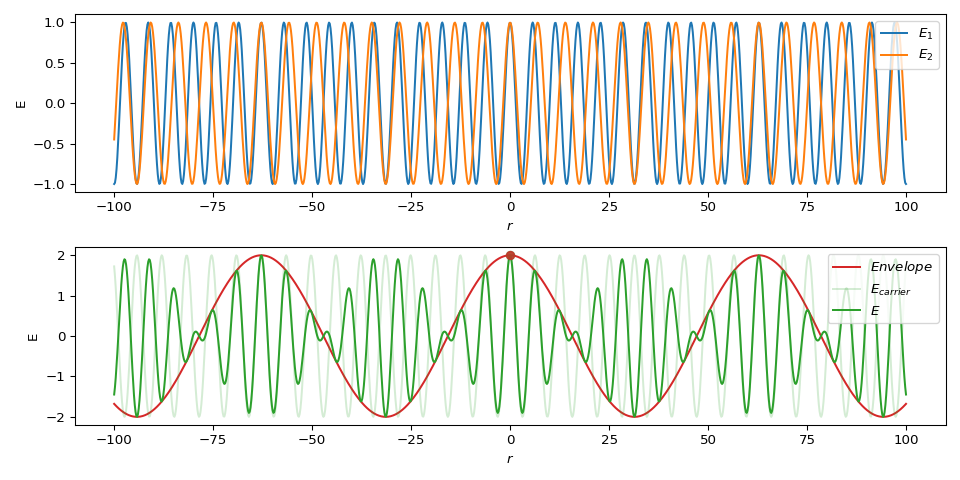

interactive(children=(FloatSlider(value=0.04991, description='dk', max=0.1, min=1e-05, step=0.0001), FloatSlid…

In [3]:
# Initial wave parameters
k = 1
dk = 0.1
w = 1
dw = 0.1
t = 0
r = np.linspace(-100, 100, 1000)

# Initial fields
E1 = np.exp(1j * ((k + dk) * r - (w + dw) * t))
E2 = np.exp(1j * ((k - dk) * r - (w - dw) * t))

# Creating figure and initial graph
plt.figure(figsize=[10, 5], dpi=96)
plt.subplot(2, 1, 1)
line1 = plt.plot(r, E1.real, label="$E_1$", color="tab:blue")
line2 = plt.plot(r, E2.real, label="$E_2$", color="tab:orange")
plt.xlabel("$r$")
plt.ylabel("E")
plt.legend(loc=1)
plt.subplot(2, 1, 2)
line3 = plt.plot(r, 2 * np.cos(dk * r - dw * t), label="$Envelope$", color="tab:red")
line4 = plt.plot(
    r,
    (E1 + E2).real / np.cos(dk * r - dw * t),
    label="$E_{carrier}$",
    color="tab:green",
    alpha=0.2,
)
line5 = plt.plot(r, (E1 + E2).real, label="$E$", color="tab:green")
point1 = plt.plot(0, 2, "o", color="tab:green", alpha=0.75)
point2 = plt.plot(0, 2, "o", color="tab:red", alpha=0.75)
plt.xlabel("$r$")
plt.ylabel("E")
plt.legend(loc=1)
plt.tight_layout()
plt.show()


# update graph
@interact(dk=(1e-5, 0.1, 1e-4), dw=(0, 0.1, 1e-4), t=(-50, 50, 0.1))
def update_graph(dk, dw, t):
    # Updating fields
    E1 = np.exp(1j * ((k + dk) * r - (w + dw) * t))
    E2 = np.exp(1j * ((k - dk) * r - (w - dw) * t))

    # Updating plots
    point1[0].set_xdata(w * t / k)
    point1[0].set_ydata(2 * np.cos(dk * w * t / k - dw * t))
    point2[0].set_xdata(dw * t / dk)
    line1[0].set_ydata(E1.real)
    line2[0].set_ydata(E2.real)
    line3[0].set_ydata(2 * np.cos(dk * r - dw * t))
    line4[0].set_ydata((E1 + E2).real / np.cos(dk * r - dw * t))
    line5[0].set_ydata((E1 + E2).real)

# Wave interference

Below is a numerical simulation of Young's classic two slit experiments. The leftmost graph shows the total electric field $E=E_1+E_2$, the centre graph shows the resulting light intensity $I=(E_1+E_2)\cdot(E_1+E_2)^*$ and the rightmost graph show the intensity on a vertical plane. The sources for $E_1$ and $E_2$ and the vertical plane are illustrated in red, and their positions can be adjusted via the sliders. Finally, notice that, though the total electric field changes through time, the intensity $I(x,y)$ does not. It remains constant through time, resulting in an interference pattern and the apparition of interference fringes on the imaging plane as prescribed by theory;

$$
I(x, y) = (E_1+E_2)\cdot(E_1+E_2)^*
$$

$$
I(x, y) = I_1 + I_2 + 2\sqrt{I_1I_2}\cos(\Delta \varphi)
$$

Here,

$$
\Delta \varphi=k|r_1(x, y)-r_2(x, y)|
$$

and is independent of time since both sources share the same frequency $\omega$.

interactive(children=(IntSlider(value=-25, description='x1', max=50, min=-50), IntSlider(value=25, description…

/home/gsheehy/python/phs2223/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


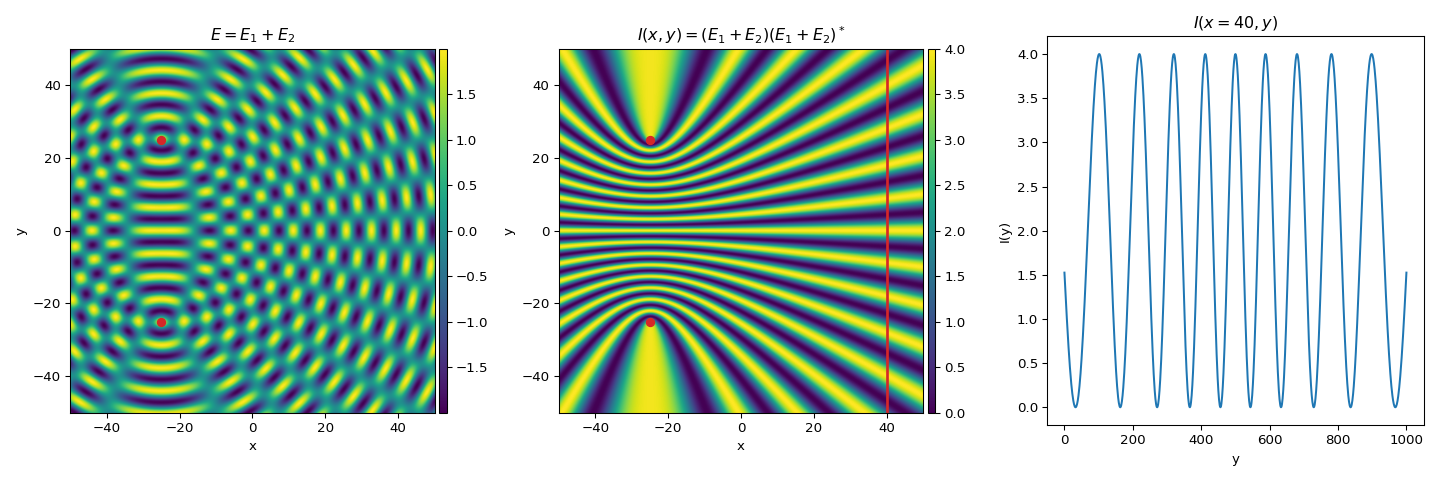

In [4]:
# Waves parameters
k = 1
w = 1

# XY domain discretization
mesh_density = 1001
grid_line = np.linspace(-50, 50, mesh_density)
XX, YY = np.meshgrid(grid_line, grid_line)

# Initial Source distances
x1, y1 = -25, 25
x2, y2 = -25, -25
r1 = np.sqrt((XX - x1) ** 2 + (YY - y1) ** 2)
r2 = np.sqrt((XX - x2) ** 2 + (YY - y2) ** 2)
plane_xpos = 40

# Initial Em fields
t = 0
E1 = np.exp(1j * (k * r1 - w * t))
E2 = np.exp(1j * (k * r2 - w * t))

# Initial figure
plt.figure(figsize=[15, 5], dpi=96)

# E1+E2 subplot
ax = plt.subplot(1, 3, 1)
s11_plot = plt.plot(x1, y1, "o", color="tab:red")
s12_plot = plt.plot(x1, y1, "o", color="tab:red")
hmap1 = plt.imshow((E1 + E2).real, extent=(-50, 50, -50, 50), origin="lower")
plt.xlabel("x")
plt.ylabel("y")
plt.title("$E=E_1+E_2$")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
plt.colorbar(cax=cax)

# 2d intensity subplot
ax = plt.subplot(1, 3, 2)
I = (E1 + E2) * (E1 + E2).conj()
hmap2 = plt.imshow(I.real, extent=(-50, 50, -50, 50), origin="lower")
s21_plot = plt.plot(x1, y1, "o", color="tab:red")
s22_plot = plt.plot(x1, y1, "o", color="tab:red")
plane_plot = plt.plot([plane_xpos, plane_xpos], [-50, 50], color="tab:red", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("$I(x, y)=(E_1+E_2)(E_1+E_2)^*$")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.05)
plt.colorbar(cax=cax)

# 1d intensity subplot
plt.subplot(1, 3, 3)
i_plane = XX == plane_xpos
I_line = I[i_plane]
Iline_plot = plt.plot(I_line.real)
plt.xlabel("y")
plt.ylabel("I(y)")
plt.title("$I(x={}, y)$".format(plane_xpos))
plt.tight_layout()


@interact(
    x1=(-50, 50, 1),
    y1=(-50, 50, 1),
    x2=(-50, 50, 1),
    y2=(-50, 50, 1),
    plane_xpos=(-50, 50, 1),
    t=(-10, 10, 0.1),
)
def update_graph(x1=-25, y1=25, x2=-25, y2=-25, plane_xpos=40, t=0):
    # Recompute r1 and r2
    r1 = np.sqrt((XX - x1) ** 2 + (YY - y1) ** 2)
    r2 = np.sqrt((XX - x2) ** 2 + (YY - y2) ** 2)

    # Updated fields
    E1 = np.exp(1j * (k * r1 - w * t))
    E2 = np.exp(1j * (k * r2 - w * t))

    # Update intensity
    I = (E1 + E2) * (E1 + E2).conj()
    i_plane = XX == plane_xpos
    I_line = I[i_plane]

    # Update figure
    hmap1.set_array((E1 + E2).real)
    hmap2.set_array(I.real)
    plane_plot[0].set_xdata([plane_xpos, plane_xpos])
    Iline_plot[0].set_ydata(I_line)
    s11_plot[0].set_xdata(x1)
    s11_plot[0].set_ydata(y1)
    s21_plot[0].set_xdata(x1)
    s21_plot[0].set_ydata(y1)
    s12_plot[0].set_xdata(x2)
    s12_plot[0].set_ydata(y2)
    s22_plot[0].set_xdata(x2)
    s22_plot[0].set_ydata(y2)

# Coherence and correlation functions

In the actual case of interference between two or more waves, the amplitudes and phases of each can slightly vary through time in a random fashion. It is therefore important to consider the irradiance *I* as the time average quantity

$$
I := <\vec{E}\cdot\vec{E}^*>
$$
$$
= <|E_1|^2 + |E_2|^2 +2Re(\vec{E_1}\cdot\vec{E_2}^*)>
$$

with the time average defined as

$$
<f> := \lim_{T\rightarrow \infty} \frac{1}{T}\int_0^T f(t)dt
$$

This leads us to an incredibly important concept in optics; the cross correlation function. Two fields ($E_1$ and $E_2$) have a *mutual coherence function*, also called a *cross correlation function* $\Gamma_{12}(\tau)$ defined as

$$
\Gamma_{12}(\tau) := <E_1(t)E_2^*(t+\tau)>
$$
$$
= \lim_{T\rightarrow \infty} \frac{1}{T}\int_0^T E_1(t)E_2^*(t+\tau)dt
$$

An attentive reader can notice how simillar this quantity is to a convolution product,

$$
\text{convolution : }(f\circledast g)(\tau) := \int_{-\infty}^{\infty}f(t)g(t-\tau)dt
$$

$$
\text{correlation : }(f*g)(\tau) := \int_{-\infty}^{\infty}f(t)g^*(t+\tau)dt
$$

Now, what does this mean? What does the quantity $\Gamma_{12}(\tau)$ (or the convolution product) actually measure? In short, they **both** are a measure of the space-time **overlap** of two different fields (or functions). If both are localized at the same space-time positions (aka overlapping), then their correlation is large. If they are fare apart in space-time (aka **not** overlapping), their correlation is small (or 0).

**NOTE**

One should be careful with the difference between the convolution and the correlation. For light waves electric fields, it often happens that $E(t) = E^*(-t)$ which can lead to confusion when using convolution instead of correlations to compute numerical quantities...

interactive(children=(FloatSlider(value=0.0, description='tau', max=50.0, min=-50.0), Output()), _dom_classes=…

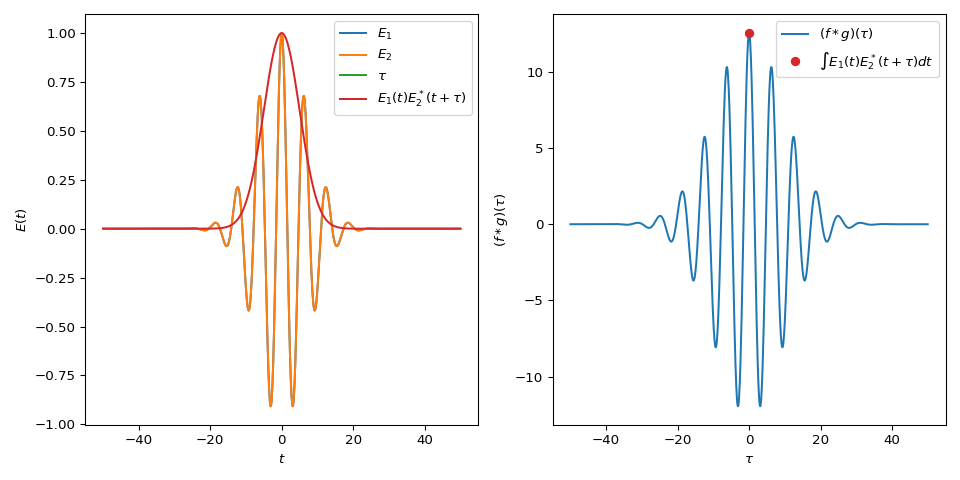

In [5]:
from scipy.signal import correlate

# Wave parameters
w = 1
tau = 0
t = np.linspace(-50, 50, 1001)
dt = t[1] - t[0]

# Initial waves
envelope = np.exp(-(((t - tau) / 10) ** 2))
E1 = np.exp(1j * w * t) * envelope
E2 = np.exp(1j * w * (t - tau)) * envelope

# Initial convolution
gamma12 = correlate(E1, E2, mode="same") * dt

# Create figure
plt.figure(figsize=[10, 5], dpi=96)

# Fields subplot
plt.subplot(1, 2, 1)
E1_plot = plt.plot(t, E1.real, label="$E_1$")
E2_plot = plt.plot(t, E2.real, label="$E_2$")
tau_plot = plt.plot([0, -tau], [1, 1], label="$\\tau$")
I_plot = plt.plot(
    t, (E1 * E2.conj()).real, color="tab:red", label="$E_1(t)E_2^*(t+\\tau)$"
)
plt.legend(loc="upper right")
plt.xlabel("$t$")
plt.ylabel("$E(t)$")

# Convolution subplot
plt.subplot(1, 2, 2)
plt.plot(t, gamma12.real, label="$(f*g)(\\tau)$")
conv_point = plt.plot(
    tau,
    (E1 * E2.conj()).real.sum() * dt,
    "o",
    color="tab:red",
    label="$\int E_1(t)E_2^*(t+\\tau)dt$",
)
plt.legend(loc="upper right")
plt.xlabel("$\\tau$")
plt.ylabel("$(f*g)(\\tau)$")
plt.tight_layout()


@interact(tau=(-50, 50, 0.1))
def update_graph(tau):
    # Updated fields
    envelope = np.exp(-(((t - tau) / 10) ** 2))
    E2 = np.exp(1j * w * (t - tau)) * envelope

    # Update Figure
    E2_plot[0].set_ydata(E2.real)
    tau_plot[0].set_xdata([0, tau])
    tau_plot[0].set_label("$\\tau = {}$".format(tau))
    I_plot[0].set_ydata((E1 * E2.conj()).real)
    conv_point[0].set_xdata(tau)
    conv_point[0].set_ydata((E1 * E2.conj()).real.sum() * dt)